## NEW CODE

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import itertools
import random
import math
import pickle
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV



In [2]:
# Function to read edges from a CSV file and return them as a dictionary
def read_edges_from_csv(csv_file):
    edges_dict = {}
    with open(csv_file, mode='r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            source_node = int(row[0])
            destination_nodes = [int(dest) for dest in row[1:] if dest.strip()]
            if destination_nodes:
                edges_dict[source_node] = destination_nodes
    return edges_dict

In [3]:
def create_graph_from_edges(edges_dict):
    G = nx.DiGraph()
    for source, destination_list in edges_dict.items():
        G.add_edges_from([(source, dest) for dest in destination_list])
    return G

In [4]:

def calculate_features(G, edge_list):
    common_neighbors = []
    jaccard_coefficient = []
    adamic_adar_coefficient = []
    resource_allocation_index = []
    sorenson_index = []
    total_followers = []
    friends_measure = []
    in_degree = []  
    out_degree = []   
    edge_rank = []  
    
    G_undirected = G.to_undirected()
    
    for source, destination in edge_list:
        if G.has_node(source) and G.has_node(destination):
            # Common Neighbors (convert to undirected for this calculation)
            common_neighbor_nodes = list(nx.common_neighbors(G_undirected, source, destination))
            common_neighbors.append(len(common_neighbor_nodes))
            
            # Jaccard Coefficient
            if len(common_neighbor_nodes) > 0:
                jaccard_coefficient.append(list(nx.jaccard_coefficient(G_undirected, [(source, destination)]))[0][2])
            else:
                jaccard_coefficient.append(0.0) 
            
            # Adamic/Adar Index
            if len(common_neighbor_nodes) > 0:
                adamic_adar_coefficient.append(sum(1 / math.log(G.degree(u) + 1) for u in common_neighbor_nodes))
            else:
                adamic_adar_coefficient.append(0.0)  
            
            # Resource Allocation Index
            if len(common_neighbor_nodes) > 0:
                resource_allocation_index.append(sum(1 / G.degree(u) for u in common_neighbor_nodes))
            else:
                resource_allocation_index.append(0.0)  
        
            if len(common_neighbor_nodes) > 0:
                sorenson_index.append(2 * len(common_neighbor_nodes) / (G.degree(source) + G.degree(destination)))
            else:
                sorenson_index.append(0.0)  
            
            total_followers.append(len(G[source]))
            
            friends_measure.append(2 * len(common_neighbor_nodes) / (G.degree(source) + G.degree(destination)))

            in_degree.append(G.in_degree(source))
            out_degree.append(G.out_degree(source))
            
#             # Transitive Friends (Directed feature)
#             transitive_friends_count = 0
#             for neighbor in common_neighbor_nodes:
#                 if G.has_edge(source, neighbor) and G.has_edge(neighbor, destination):
#                     transitive_friends_count += 1
#             transitive_friends.append(transitive_friends_count)
           
            edge_rank.append(0.0)  
            
            
        else:
          
            common_neighbors.append(0)
            jaccard_coefficient.append(0.0)
            adamic_adar_coefficient.append(0.0)
            resource_allocation_index.append(0.0)
            sorenson_index.append(0.0)
            total_followers.append(0)
            friends_measure.append(0.0)
            in_degree.append(0)  
            out_degree.append(0)  
            transitive_friends.append(0)  
            edge_rank.append(0.0)  

    return common_neighbors, jaccard_coefficient, adamic_adar_coefficient, resource_allocation_index, sorenson_index, total_followers, friends_measure, in_degree, out_degree, edge_rank


In [5]:
def train_model(X_train, y_train, X_val, y_val):
    model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
        keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
        keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])
    from keras.optimizers import Adam
    initial_lr = 0.001
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_lr, decay_steps=10000, decay_rate=0.9
    )
    optimizer = Adam(learning_rate=lr_schedule)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    

    early_stopping = keras.callbacks.EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)
    
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    return model, history

In [7]:
def train_model2(X_train, y_train, X_val, y_val):
    model = keras.Sequential([
        keras.layers.Dense(256, activation=tf.nn.leaky_relu, input_shape=(X_train.shape[1],)),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(128, activation=tf.nn.leaky_relu),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(64, activation=tf.nn.leaky_relu),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation=tf.nn.leaky_relu),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    from keras.optimizers import Adam
    initial_lr = 0.001
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_lr, decay_steps=10000, decay_rate=0.9
    )
    optimizer = Adam(learning_rate=lr_schedule)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Early stopping to terminate training early if the validation accuracy doesn't improve
    early_stopping = keras.callbacks.EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)
    
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    return model, history


In [28]:


def train_random_forest(X_train, y_train):
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    return clf




In [29]:
from sklearn.linear_model import LogisticRegression

def train_logistic_regression(X_train, y_train):
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    return clf


In [8]:
train_csv_file = '/kaggle/input/ds-data/train.csv'
edges_dict = read_edges_from_csv(train_csv_file)
G_train = create_graph_from_edges(edges_dict)

In [14]:

G = nx.DiGraph()

# Add edges from your loaded data
for source, destination_list in edges_dict.items():
    G.add_edges_from([(source, dest) for dest in destination_list])
    
all_nodes = list(G.nodes)

In [9]:


all_source_nodes = list(edges_dict.keys())
len(all_source_nodes)

subset_size = 15000

subset_nodes = random.sample(all_source_nodes, subset_size)


In [12]:
existing_edges = [(source, dest) for source, destinations in edges_dict.items() for dest in destinations]
#print('length of existing_edges',len(existing_edges))

In [13]:
positive_samples = random.sample(existing_edges, subset_size)

In [37]:
positive_samples

[(361172, 3711551),
 (4278741, 843730),
 (285422, 678055),
 (4583394, 4241392),
 (2599793, 2401120),
 (3504159, 737289),
 (924720, 1148818),
 (193463, 3021363),
 (3999363, 1455423),
 (2686231, 3146183),
 (1991964, 2927984),
 (3757548, 4198200),
 (2031176, 1893118),
 (4695163, 1751280),
 (271993, 1568460),
 (4243429, 795081),
 (4655380, 676106),
 (2882075, 1198956),
 (1022841, 4806017),
 (2150983, 4692885),
 (3408598, 2552084),
 (2864503, 4481139),
 (2598639, 2091060),
 (1233183, 653244),
 (2687424, 3823056),
 (4512905, 516810),
 (3368328, 2016014),
 (2693864, 678274),
 (4627842, 4831639),
 (1799530, 647608),
 (4738172, 1844725),
 (59401, 382804),
 (4000702, 560185),
 (4839837, 942835),
 (301543, 3830141),
 (123208, 2751501),
 (2307099, 1412707),
 (897832, 2063717),
 (545211, 4387212),
 (2870249, 4002870),
 (3144415, 1445447),
 (4173001, 3914634),
 (343156, 3266023),
 (2751905, 4843443),
 (4690747, 1336389),
 (1521784, 4180153),
 (579783, 2755092),
 (1891764, 4570083),
 (1085861, 423877

In [38]:
len(positive_samples)

1000

/tmp/ipykernel_32/1694355946.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(G.nodes(), num_nodes_to_sample)


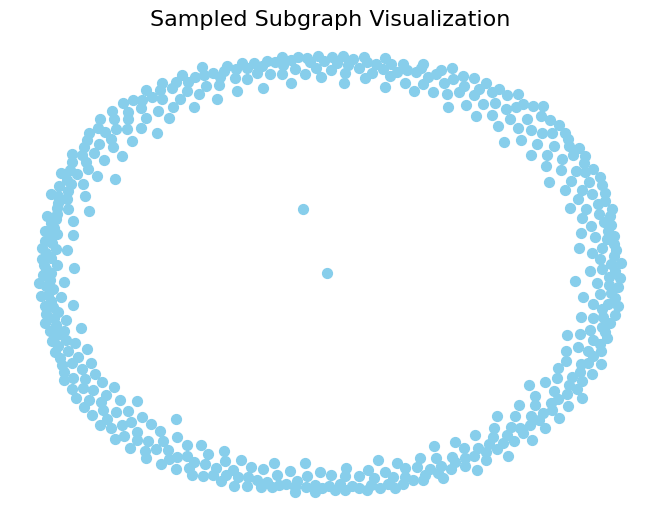

In [40]:
num_nodes_to_sample = 500

sampled_nodes = random.sample(G.nodes(), num_nodes_to_sample)

subgraph = G.subgraph(sampled_nodes)

pos = nx.spring_layout(subgraph, seed=42)
nx.draw(subgraph, pos, with_labels=False, node_color='skyblue', node_size=50, font_size=8)
plt.title('Sampled Subgraph Visualization', fontsize=16)
plt.show()

In [15]:
subset_nodes = random.sample(all_source_nodes, subset_size)

In [16]:
subset_nodes

[1605080,
 594102,
 3171357,
 816429,
 4482035,
 3305277,
 3605879,
 3625220,
 4507085,
 2558878,
 4240052,
 1201613,
 824804,
 929160,
 2255415,
 2796612,
 1081824,
 4517681,
 2078197,
 2755928,
 4283986,
 2381802,
 1062392,
 728967,
 106401,
 4459624,
 2691228,
 1801537,
 4805832,
 4429673,
 1615949,
 4587634,
 1304099,
 4575559,
 4568288,
 3906413,
 555295,
 2587612,
 2816726,
 2518983,
 2195214,
 1043742,
 4756756,
 338510,
 2347114,
 319949,
 2425406,
 4176096,
 2373967,
 2833468,
 3877776,
 1575830,
 4384789,
 3879270,
 3661359,
 2132415,
 1939684,
 3152922,
 4648824,
 3512208,
 1843401,
 427669,
 719555,
 4192906,
 3669573,
 4101037,
 3765710,
 1982031,
 589050,
 1309962,
 4764625,
 4182126,
 3191573,
 670254,
 492323,
 4844791,
 4002040,
 4027309,
 4603373,
 3417719,
 453787,
 3975777,
 951108,
 3299703,
 1856815,
 3930545,
 3197218,
 3236279,
 2852728,
 2386126,
 3413056,
 4847083,
 4048436,
 149576,
 1402610,
 4262056,
 516565,
 3113422,
 60998,
 2908942,
 4182021,
 4839356,


In [17]:


randomly_selected_nodes = []


while len(randomly_selected_nodes) < 15000:
    node = random.choice(all_nodes)
    

    if node not in subset_nodes and all(not G.has_edge(sub_node, node) for sub_node in subset_nodes):
        randomly_selected_nodes.append(node)




In [44]:
type(randomly_selected_nodes)

list

In [18]:

negative_samples = []


if len(subset_nodes) == len(randomly_selected_nodes):

    for subset_node, random_node in zip(subset_nodes, randomly_selected_nodes):
        pair = (subset_node, random_node)
        negative_samples.append(pair)
else:
    print("Error: The two lists have different lengths.")



In [19]:
balanced_edges = positive_samples + negative_samples

In [47]:
len(balanced_edges)

2000

In [20]:
# Calculate features for train data
common_neighbors, jaccard_coefficient, adamic_adar_coefficient, resource_allocation_index, sorenson_index, total_followers, friends_measure, in_degree, out_degree, edge_rank = calculate_features(G, balanced_edges)



In [21]:
# Combine features into a feature matrix
X_train = np.column_stack((common_neighbors, jaccard_coefficient, adamic_adar_coefficient, resource_allocation_index, sorenson_index, total_followers, friends_measure, in_degree, out_degree, edge_rank))
y_train = np.array([1] * subset_size + [0] * subset_size)

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [22]:

# Save X_train and y_train to a file
with open('X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)

with open('y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)
import pickle




In [37]:

# Load X_train and y_train from saved files
with open('/kaggle/working/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('/kaggle/working/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Train the Random Forest model
rf_model = train_random_forest(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy}")
print(report)

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Train the Logistic Regression model
lr_model = train_logistic_regression(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy}")
print(report)


In [38]:
# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [39]:
print(X_train.shape)
print(y_train.shape)

(30000, 10)
(30000,)


In [ ]:


tuned_params = {
    'max_depth': [1, 2, 3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300, 400, 500],
    'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]
}

model = XGBClassifier()


random_search = RandomizedSearchCV(
    model, tuned_params, n_iter=15, scoring='roc_auc', n_jobs=-1, cv=5, verbose=1, random_state=42
)

random_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", random_search.best_params_)

best_model = random_search.best_estimator_


In [40]:
# Split train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=36)

# Train the model
model, history = train_model(X_train, y_train, X_val, y_val)

Epoch 1/50
375/375 [==============================] - 4s 7ms/step - loss: 0.2502 - accuracy: 0.9076 - val_loss: 0.6398 - val_accuracy: 0.5147
Epoch 2/50
375/375 [==============================] - 2s 6ms/step - loss: 0.2298 - accuracy: 0.9137 - val_loss: 0.2382 - val_accuracy: 0.9140
Epoch 3/50
375/375 [==============================] - 2s 6ms/step - loss: 0.2260 - accuracy: 0.9141 - val_loss: 0.2197 - val_accuracy: 0.9178
Epoch 4/50
375/375 [==============================] - 2s 6ms/step - loss: 0.2243 - accuracy: 0.9151 - val_loss: 0.2283 - val_accuracy: 0.9175
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.2235 - accuracy: 0.9155 - val_loss: 0.2239 - val_accuracy: 0.9145
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.2187 - accuracy: 0.9168 - val_loss: 0.2159 - val_accuracy: 0.9168
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.2179 - accuracy: 0.9163 - val_loss: 0.2425 - val_accuracy: 0.9177
Epoch 

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_2 (Batc  (None, 64)               2

In [45]:
from sklearn.metrics import accuracy_score, classification_report

y_val_pred = model.predict(X_val)

y_val_pred_binary = (y_val_pred > 0.5).astype(int)

accuracy = accuracy_score(y_val, y_val_pred_binary)
report = classification_report(y_val, y_val_pred_binary)

print(f"Neural Network Model Accuracy on Validation Data: {accuracy}")
print("Classification Report on Validation Data:")
print(report)


188/188 [==============================] - 1s 2ms/step
Neural Network Model Accuracy on Validation Data: 0.9168333333333333
Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      2973
           1       0.93      0.90      0.92      3027

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000



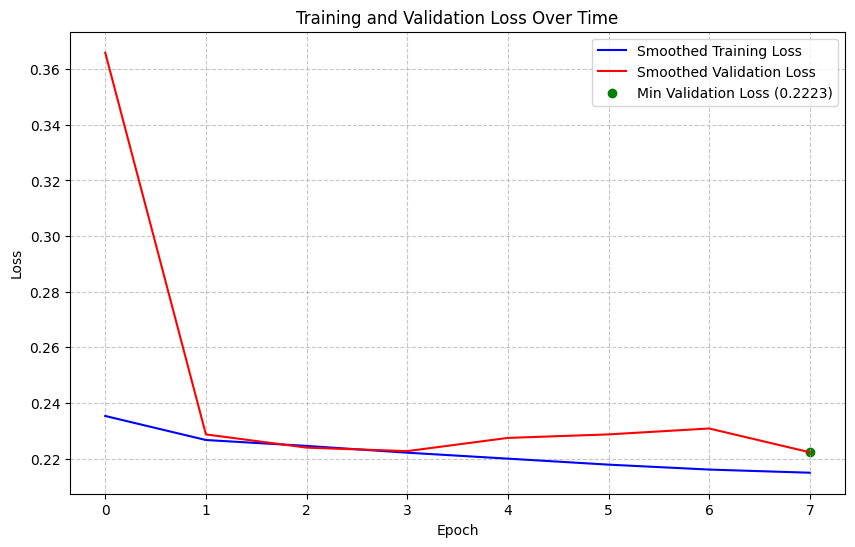

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 

smoothed_training_loss = [sum(history.history['loss'][i-3:i])/3 for i in range(3, len(history.history['loss']))]
smoothed_validation_loss = [sum(history.history['val_loss'][i-3:i])/3 for i in range(3, len(history.history['val_loss']))]

plt.plot(smoothed_training_loss, color='b', label='Smoothed Training Loss')
plt.plot(smoothed_validation_loss, color='r', label='Smoothed Validation Loss')

min_val_loss = min(smoothed_validation_loss)
min_val_loss_epoch = smoothed_validation_loss.index(min_val_loss)
plt.scatter(min_val_loss_epoch, min_val_loss, color='g', marker='o', label=f'Min Validation Loss ({min_val_loss:.4f})')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.savefig('loss_plot.png')
plt.show()


750/750 [==============================] - 2s 2ms/step


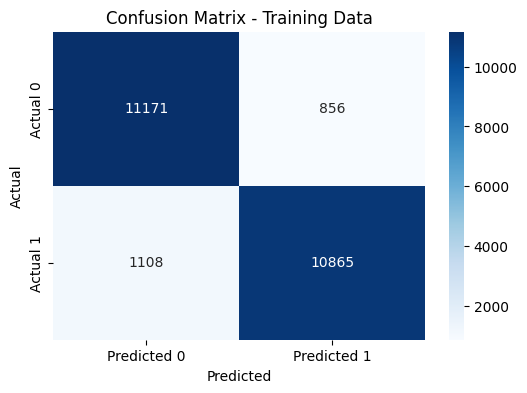

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_train_pred = model.predict(X_train)


y_train_pred_binary = (y_train_pred > 0.5).astype(int)


confusion_matrix_train = confusion_matrix(y_train, y_train_pred_binary)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_train, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Data')
plt.savefig('confusion_matrix_train.png')
plt.show()



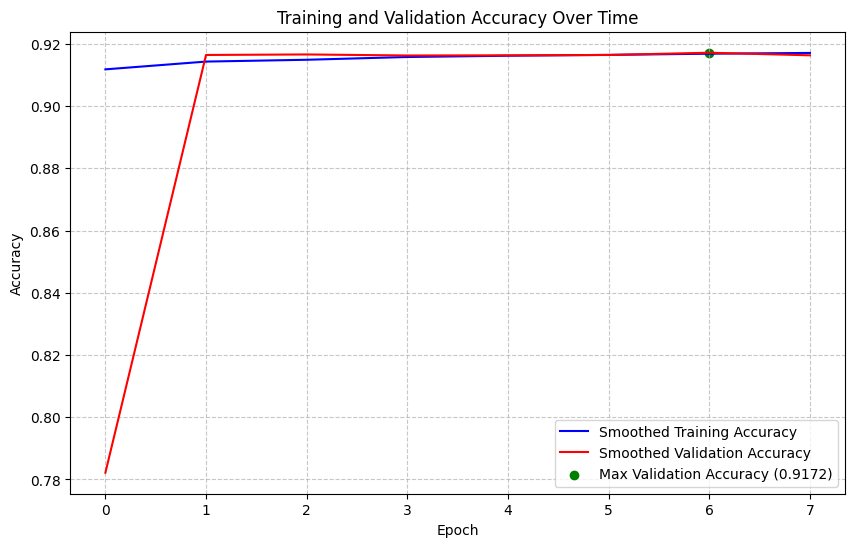

In [47]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


smoothed_training_accuracy = [sum(history.history['accuracy'][i-3:i])/3 for i in range(3, len(history.history['accuracy']))]
smoothed_validation_accuracy = [sum(history.history['val_accuracy'][i-3:i])/3 for i in range(3, len(history.history['val_accuracy']))]

plt.plot(smoothed_training_accuracy, color='b', label='Smoothed Training Accuracy')
plt.plot(smoothed_validation_accuracy, color='r', label='Smoothed Validation Accuracy')

max_val_accuracy = max(smoothed_validation_accuracy)
max_val_accuracy_epoch = smoothed_validation_accuracy.index(max_val_accuracy)
plt.scatter(max_val_accuracy_epoch, max_val_accuracy, color='g', marker='o', label=f'Max Validation Accuracy ({max_val_accuracy:.4f})')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Time')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.savefig('accuracy_plot.png')
plt.show()


In [30]:

with open('/kaggle/input/pre-loaded-xy-train/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('/kaggle/input/pre-loaded-xy-train/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

In [31]:
print(X_train.shape)
print(y_train.shape)

(38000, 11)
(38000,)


In [ ]:

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

model, history = train_model2(X_train, y_train, X_val, y_val)

ValueError: Found input variables with inconsistent numbers of samples: [30000, 38000]

In [ ]:
model.summary()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  

smoothed_training_loss = [sum(history.history['loss'][i-3:i])/3 for i in range(3, len(history.history['loss']))]
smoothed_validation_loss = [sum(history.history['val_loss'][i-3:i])/3 for i in range(3, len(history.history['val_loss']))]
plt.plot(smoothed_training_loss, color='b', label='Smoothed Training Loss')
plt.plot(smoothed_validation_loss, color='r', label='Smoothed Validation Loss')

min_val_loss = min(smoothed_validation_loss)
min_val_loss_epoch = smoothed_validation_loss.index(min_val_loss)
plt.scatter(min_val_loss_epoch, min_val_loss, color='g', marker='o', label=f'Min Validation Loss ({min_val_loss:.4f})')


plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.savefig('loss_plot.png')
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('/kaggle/input/ds-data/test.csv')

# Create a list of tuples from the "From" and "To" columns
test_list = [(row['From'], row['To']) for index, row in df.iterrows()]


In [ ]:

common_neighbors_t, jaccard_coefficient_t, adamic_adar_coefficient_t, resource_allocation_index_t, sorenson_index_t, total_followers_t, friends_measure_t, in_degree_t, out_degree_t, edge_rank_t = calculate_features(G, test_list)

X_test_ts = np.column_stack((common_neighbors_t, jaccard_coefficient_t, adamic_adar_coefficient_t, resource_allocation_index_t, sorenson_index_t, total_followers_t, friends_measure_t, in_degree_t, out_degree_t, edge_rank_t))

In [ ]:
print(X_test_ts.shape)

In [76]:
# Standardize the feature values
scaler = StandardScaler()
X_test_ts_scaled = scaler.fit_transform(X_test_ts)

In [ ]:
import pickle

# Save X_train and y_train to a file
with open('X_test_ts.pkl', 'wb') as f:
    pickle.dump(X_test_ts, f)


In [ ]:

with open('X_train.pkl', 'rb') as f:
    X_train_ts = pickle.load(f)


In [ ]:
len(X_test_ts)

In [77]:
y_pred=model.predict(X_test_ts_scaled)
#y_predz

63/63 [==============================] - 0s 2ms/step


In [ ]:
# # Assuming you already have the best_model from the previous steps Random search cv

# # Use the best model to make predictions on the test data
# y_test_pred = best_model.predict(X_test_ts_scaled)



In [78]:

ids = np.arange(1, 2001)

# Create a structured array with 'Id' as integers and 'Predictions' as floats
results = np.array(list(zip(ids.astype(int), y_pred.ravel())), dtype=[('ID', int), ('Predictions', float)])

# Save the structured array to a CSV file
np.savetxt('predictions_latest_30.csv', results, delimiter=',', fmt='%d,%f', header='ID,Predictions', comments='')

print("Predictions saved to 'predictions.csv'")


Predictions saved to 'predictions.csv'
